# (Ford GoBike System Data in Jan 2018)
## by (Abdulkhaliq G. Baban)

## Preliminary Wrangling

>This document is exploring & visualizing the trips of Ford GoBike system data for public containing around 85,000 rides in  Jan 2018.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read CSV file we downloaded
df = pd.read_csv('201801-fordgobike-tripdata.csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


In [5]:
df.shape

(94802, 16)

In [6]:
# check for any duplicated value 
df.duplicated().sum()

0

In [7]:
# check for any null value 
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64

In [8]:
# take a copy of data to start to clean
df_clean = df.copy()

In [9]:
# remove all rows with null value of member_birth_year
df_clean = df[df['member_birth_year'].isnull() == False]

In [10]:
# check for any null value 
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
df_clean.duplicated().sum()

0

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               86963 non-null int64
start_time                 86963 non-null object
end_time                   86963 non-null object
start_station_id           86963 non-null int64
start_station_name         86963 non-null object
start_station_latitude     86963 non-null float64
start_station_longitude    86963 non-null float64
end_station_id             86963 non-null int64
end_station_name           86963 non-null object
end_station_latitude       86963 non-null float64
end_station_longitude      86963 non-null float64
bike_id                    86963 non-null int64
user_type                  86963 non-null object
member_birth_year          86963 non-null float64
member_gender              86963 non-null object
bike_share_for_all_trip    86963 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.3+ MB


In [13]:
# Change start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

C:\Users\welco\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               86963 non-null int64
start_time                 86963 non-null datetime64[ns]
end_time                   86963 non-null datetime64[ns]
start_station_id           86963 non-null int64
start_station_name         86963 non-null object
start_station_latitude     86963 non-null float64
start_station_longitude    86963 non-null float64
end_station_id             86963 non-null int64
end_station_name           86963 non-null object
end_station_latitude       86963 non-null float64
end_station_longitude      86963 non-null float64
bike_id                    86963 non-null int64
user_type                  86963 non-null object
member_birth_year          86963 non-null float64
member_gender              86963 non-null object
bike_share_for_all_trip    86963 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 11.3+ MB


In [15]:
# Change user_type, member_gender, and bike_share_for_all_trip to category format
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               86963 non-null int64
start_time                 86963 non-null datetime64[ns]
end_time                   86963 non-null datetime64[ns]
start_station_id           86963 non-null int64
start_station_name         86963 non-null object
start_station_latitude     86963 non-null float64
start_station_longitude    86963 non-null float64
end_station_id             86963 non-null int64
end_station_name           86963 non-null object
end_station_latitude       86963 non-null float64
end_station_longitude      86963 non-null float64
bike_id                    86963 non-null int64
user_type                  86963 non-null category
member_birth_year          86963 non-null float64
member_gender              86963 non-null category
bike_share_for_all_trip    86963 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(4), object(2)
memory usage

In [17]:
# Change bike_id, start_station_id, and end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               86963 non-null int64
start_time                 86963 non-null datetime64[ns]
end_time                   86963 non-null datetime64[ns]
start_station_id           86963 non-null object
start_station_name         86963 non-null object
start_station_latitude     86963 non-null float64
start_station_longitude    86963 non-null float64
end_station_id             86963 non-null object
end_station_name           86963 non-null object
end_station_latitude       86963 non-null float64
end_station_longitude      86963 non-null float64
bike_id                    86963 non-null object
user_type                  86963 non-null category
member_birth_year          86963 non-null float64
member_gender              86963 non-null category
bike_share_for_all_trip    86963 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memory us

In [19]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

C:\Users\welco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

C:\Users\welco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

C:\Users\welco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

C:\Users\welco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

C:\Users\welco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df_clean.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,start_time_day,start_time_weekday,start_time_month_name,start_time_month
94792,1099,2018-01-01 00:20:47.360,2018-01-01 00:39:07.162,16,Steuart St at Market St,37.794130,-122.394430,93,4th St at Mission Bay Blvd S,37.770407,...,2670,Customer,1984.0,Female,No,0,1,Mon,January,1
94793,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,...,2173,Customer,1995.0,Male,No,0,1,Mon,January,1
94799,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,...,3455,Subscriber,1992.0,Male,No,0,1,Mon,January,1
94800,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,...,2423,Subscriber,1986.0,Male,No,0,1,Mon,January,1
94801,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,...,2473,Subscriber,1957.0,Male,No,0,1,Mon,January,1


In [25]:
# check for any null value 
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_time_hour            0
start_time_day             0
start_time_weekday         0
start_time_month_name      0
start_time_month           0
dtype: int64

In [26]:
# check for any duplicated value 
df_clean.duplicated().sum()

0

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 21 columns):
duration_sec               86963 non-null int64
start_time                 86963 non-null datetime64[ns]
end_time                   86963 non-null datetime64[ns]
start_station_id           86963 non-null object
start_station_name         86963 non-null object
start_station_latitude     86963 non-null float64
start_station_longitude    86963 non-null float64
end_station_id             86963 non-null object
end_station_name           86963 non-null object
end_station_latitude       86963 non-null float64
end_station_longitude      86963 non-null float64
bike_id                    86963 non-null object
user_type                  86963 non-null category
member_birth_year          86963 non-null float64
member_gender              86963 non-null category
bike_share_for_all_trip    86963 non-null category
start_time_hour            86963 non-null int64
start_time_day             86963 

In [28]:
df_clean.shape

(86963, 21)

In [29]:
# save cleaned data 
df_clean.to_csv('clean_file.csv', index=False)

### What is the structure of your dataset?
The dataset has around 85,000 rides in January 2018 & has information for each trip as list:
- duration_sec               
- start_time                 
- end_time                      
- bike_id                    
- user_type                  
- bike_share_for_all_trip    
- start_time_hour            
- start_time_day             
- start_time_weekday         
- start_time_month_name      
- start_time_month           

### What is/are the main feature(s) of interest in your dataset?
- Member Gender & Age
- rental time & duration 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start_station_id           
- start_station_name         
- start_station_latitude     
- start_station_longitude    
- end_station_id             
- end_station_name           
- end_station_latitude       
- end_station_longitude  
- member_birth_year          
- member_gender              


## Univariate Exploration

> In this section, we will investigate distributions of individual variables. we will see the number of rental bike by weekday, date & hour. also, we will see the rental bike by duration of the trip

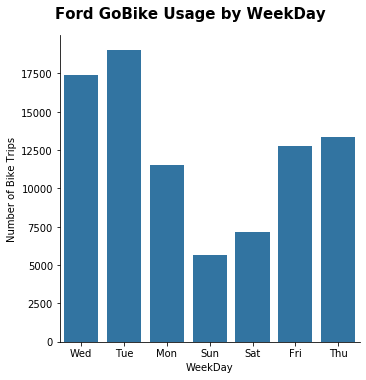

In [30]:
# Ford GoBike system usage by weekday
no_color = sb.color_palette()[0]
month_graph = sb.catplot(data = df_clean, x = 'start_time_weekday', kind = 'count', color = no_color);
month_graph.set_axis_labels('WeekDay', 'Number of Bike Trips'),
month_graph.fig.suptitle('Ford GoBike Usage by WeekDay', y = 1.05, fontsize = 15, fontweight = 'semibold');

> Note: mostly poeple using ford GoBike system on Wednesday & Tuesday. On other hand, On Sunday is lowest number of trips because of weekend. 

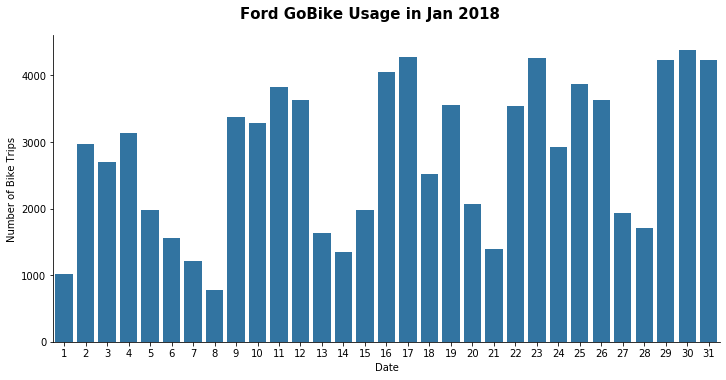

In [31]:
# Ford GoBike system usage by Date 
date_graph = sb.catplot(data = df_clean, x = 'start_time_day', kind = 'count', color = no_color, aspect = 2);
date_graph.set_axis_labels('Date', 'Number of Bike Trips'),
date_graph.fig.suptitle('Ford GoBike Usage in Jan 2018', y = 1.05, fontsize = 15, fontweight = 'semibold');

> Note: we observe most of poeple using the ford GoBike system in the weekday starting from Tueday to Friday. on the other hand, few poeple using bike system in the weekend & first day of the week from Saturday to Monday.

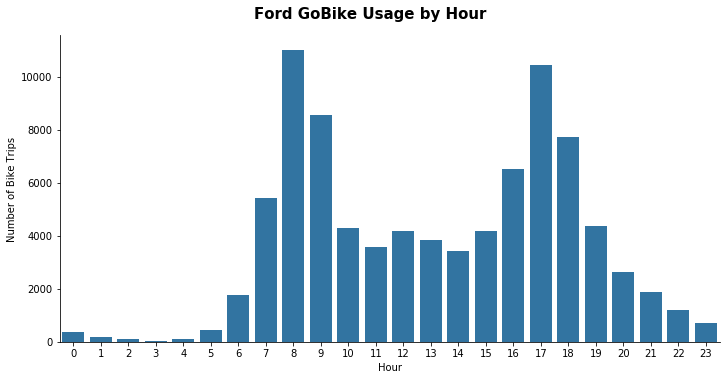

In [32]:
# Ford GoBike system usage by Hour 
hour_graph = sb.catplot(data = df_clean, x = 'start_time_hour', kind = 'count', color = no_color, aspect = 2);
hour_graph.set_axis_labels('Hour', 'Number of Bike Trips'),
hour_graph.fig.suptitle('Ford GoBike Usage by Hour', y = 1.05, fontsize = 15, fontweight = 'semibold');

> the first Peak time in the morning from 07:00 to 09:00 begining of school classes & working time of companies. the second peak time in the afternoon from 16:00 to 18:00 ending of school classes & working time of companies.  


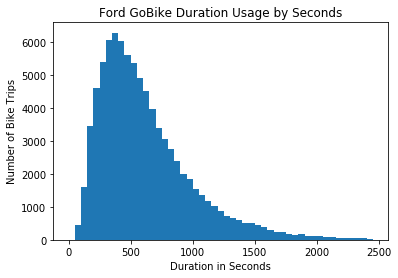

In [33]:
# Ford GoBike system usage by duration 
second_edges = np.arange(0, 2500,50)
plt.hist(data = df_clean, x = 'duration_sec', bins = second_edges)
plt.title("Ford GoBike Duration Usage by Seconds")
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Bike Trips');

> most of people using Ford GoBike for short period from 4 to 12 min (250 to 750 seconds)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> after removing the rows without the birth date, the data became has NO Null value. we just chaged the type of variables and extract the date & time info from start_time column. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did not face any problem during operation on the data after cleaning.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our
data and we will see the number of rental bike by (weekday, date & hour) & user type. 

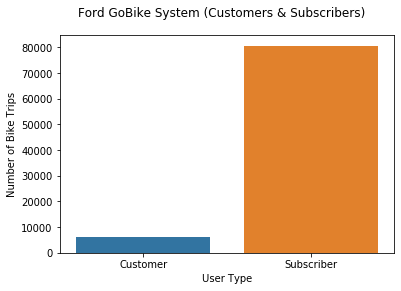

In [34]:
# Ford GoBike system usage by user type
user_graph = sb.countplot(data = df_clean, x = 'user_type')
plt.suptitle('Ford GoBike System (Customers & Subscribers)')
user_graph.set_xlabel('User Type')
user_graph.set_ylabel('Number of Bike Trips');

> most of users are Subscriber 

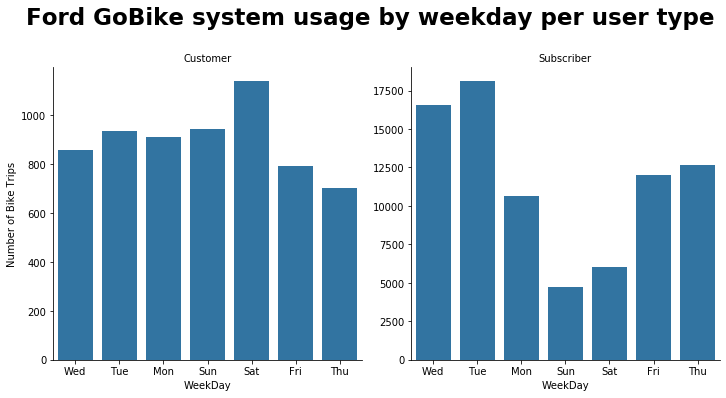

In [35]:
# Ford GoBike system usage by weekday per user type
day_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_weekday', col = "user_type", kind ='count', sharey = False,
            color = no_color)
day_user_ghraph.set_axis_labels("WeekDay", "Number of Bike Trips")
day_user_ghraph.set_titles("{col_name}")
day_user_ghraph.fig.suptitle('Ford GoBike system usage by weekday per user type', y=1.1, fontsize=23, fontweight='semibold');

> Customer users mostly using Bike system on Saturday & Subscriber users mostly using Bike system on Tuesday.

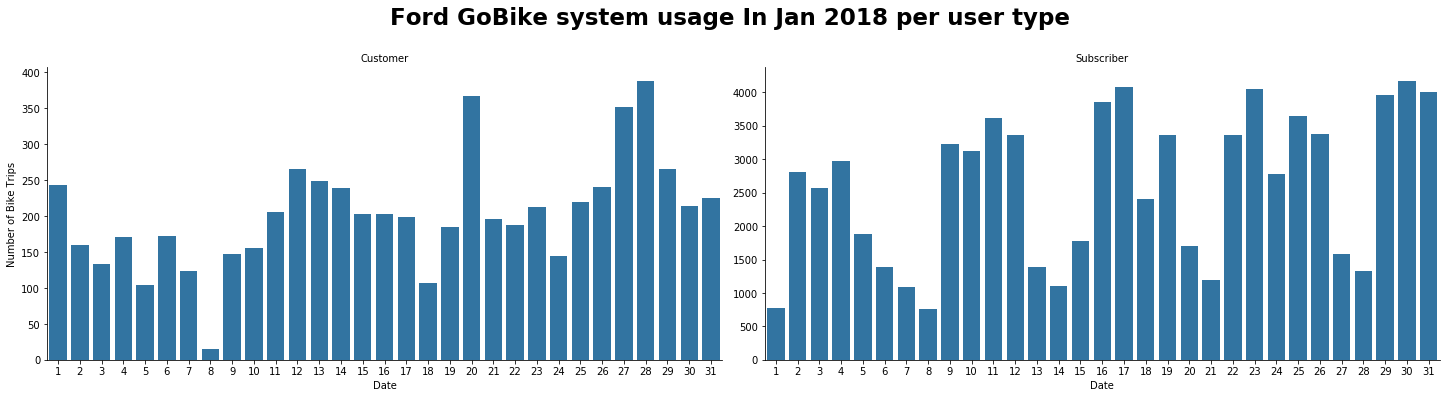

In [36]:
# Ford GoBike system usage by Date per user type
date_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_day', col = "user_type", kind ='count', sharey = False,
            color = no_color, aspect = 2)
date_user_ghraph.set_axis_labels("Date", "Number of Bike Trips")
date_user_ghraph.set_titles("{col_name}")
date_user_ghraph.fig.suptitle('Ford GoBike system usage In Jan 2018 per user type', y=1.1, fontsize=23, fontweight='semibold');

> Customer users using Bike system similarly during a month but Subscriber users using Bike system mostly during weekdays.

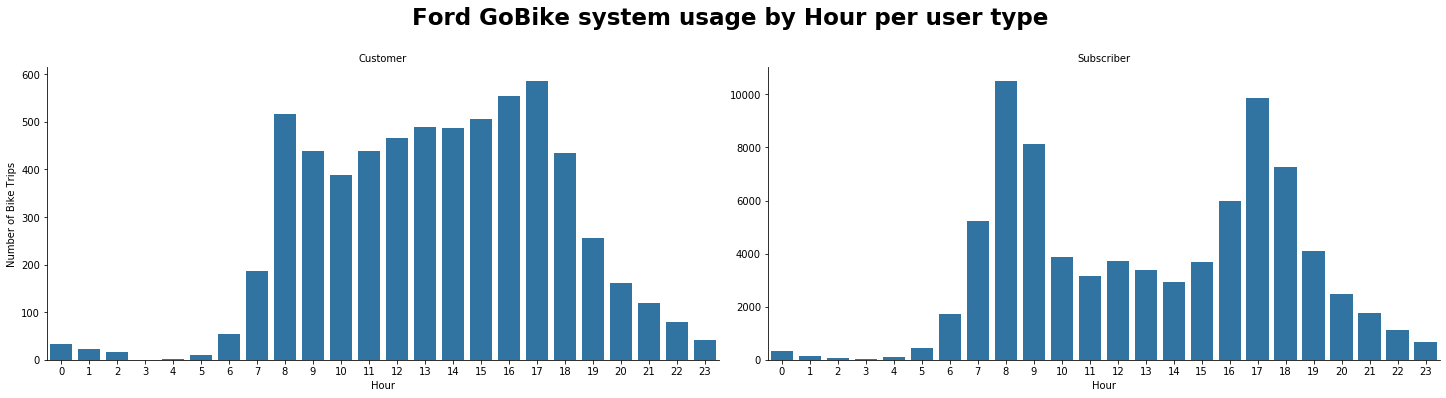

In [37]:
# Ford GoBike system usage by Hour per user type
hour_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_hour', col = "user_type", kind ='count', sharey = False,
            color = no_color, aspect = 2)
hour_user_ghraph.set_axis_labels("Hour", "Number of Bike Trips")
hour_user_ghraph.set_titles("{col_name}")
hour_user_ghraph.fig.suptitle('Ford GoBike system usage by Hour per user type', y=1.1, fontsize=23, fontweight='semibold');

> Customer users using Bike system similarly from 08:00 to 18:00 but Subscriber users using Bike system mostly on begining & ending of the day.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are some points we observed as list:
  - Most of users are Subscriber. 
  - Customer users mostly using Bike system on Saturday & Subscriber users mostly using Bike system on Tuesday.
  - Customer users using Bike system similarly during a month but Subscriber users using Bike system mostly during weekdays.
  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, we observe Customer users using Bike system similarly from 08:00 to 18:00 but Subscriber users using Bike system mostly on begining & ending of the day.

## Multivariate Exploration

> we will create plots of three variables to investigate our data even
further. we will see the number of rental bike by (weekday, date & hour), user type & user gender.

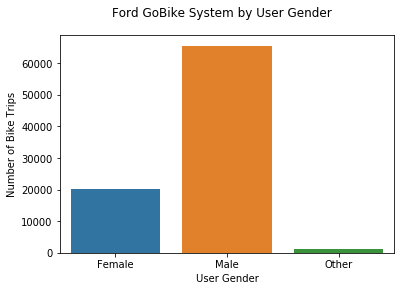

In [38]:
# Ford GoBike system usage by user Gender
gender_graph = sb.countplot(data = df_clean, x = 'member_gender')
plt.suptitle('Ford GoBike System by User Gender')
gender_graph.set_xlabel('User Gender')
gender_graph.set_ylabel('Number of Bike Trips');

> we observed that most user of GoBike system are male gender.

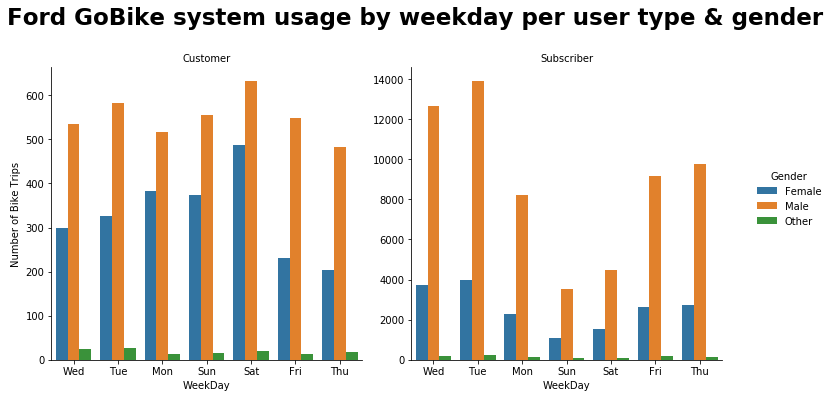

In [39]:
# Ford GoBike system usage by weekday per user type & gender
day_gender_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_weekday', col = "user_type", hue='member_gender', kind ='count', sharey = False)
day_gender_user_ghraph.set_axis_labels("WeekDay", "Number of Bike Trips")
day_gender_user_ghraph.set_titles("{col_name}")
day_gender_user_ghraph.fig.suptitle('Ford GoBike system usage by weekday per user type & gender', y=1.1, fontsize=23, fontweight='semibold')
day_gender_user_ghraph._legend.set_title('Gender');

> The number customer Female users is more than subscriber Female users during weekdays.

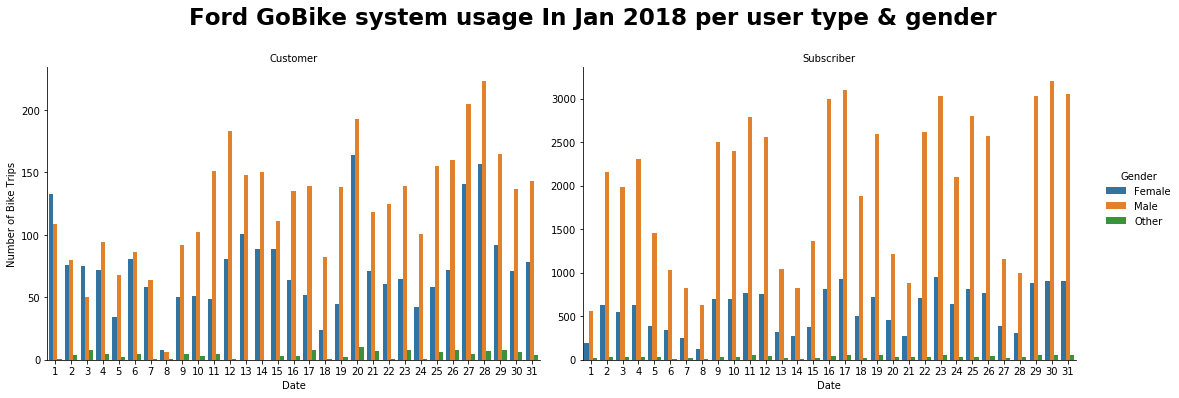

In [40]:
# Ford GoBike system usage by Date per user type & gender
date_gender_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_day', col = "user_type", hue='member_gender', kind ='count', sharey = False, aspect = 1.5)
date_gender_user_ghraph.set_axis_labels("Date", "Number of Bike Trips")
date_gender_user_ghraph.set_titles("{col_name}")
date_gender_user_ghraph.fig.suptitle('Ford GoBike system usage In Jan 2018 per user type & gender', y=1.1, fontsize=23, fontweight='semibold')
date_gender_user_ghraph._legend.set_title('Gender');

>The number subscriber male users is more than customer male users during January 2018.
On other hand, The number customer female users is more than  subscriber female users during January 2018.
number of Other gender users are very low in both customer & subscriber users during January 2018.

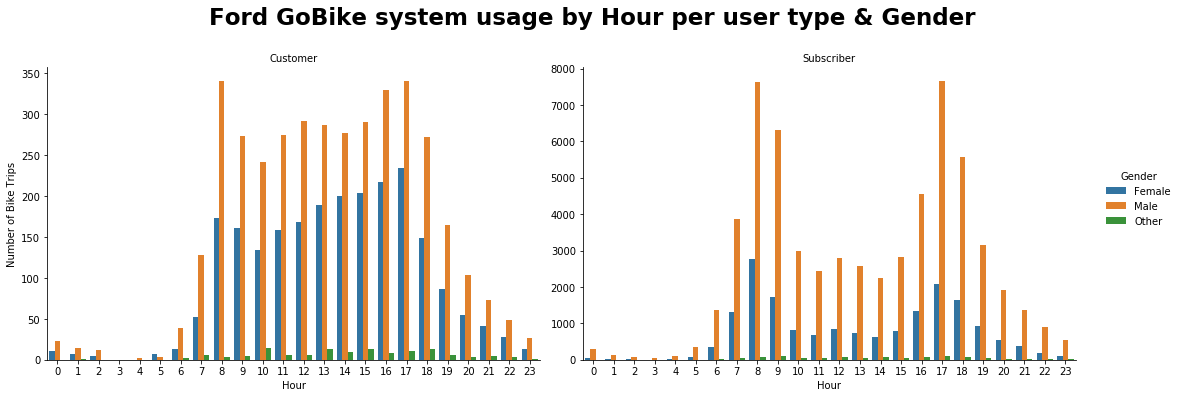

In [41]:
# Ford GoBike system usage by Hour per user type & gender
hour_gender_user_ghraph = sb.catplot(data = df_clean, x = 'start_time_hour', col = "user_type", hue='member_gender', kind ='count', sharey = False, aspect = 1.5)
hour_gender_user_ghraph.set_axis_labels("Hour", "Number of Bike Trips")
hour_gender_user_ghraph.set_titles("{col_name}")
hour_gender_user_ghraph.fig.suptitle('Ford GoBike system usage by Hour per user type & Gender', y=1.1, fontsize=23, fontweight='semibold')
hour_gender_user_ghraph._legend.set_title('Gender');

> The peak time for customer male user from 08:00 to 18:00 but for subscriber male user from 08:00 to 09:00 & from 17:00 to 18:00

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There are some points we observe as list:
  - we observed that most user of GoBike system are male gender.
  - The number customer Female users is more than subscriber Female users during weekdays.
  - The number subscriber male users is more than customer male users during January 2018. On other hand, The number customer female users is more than subscriber female users during January 2018. number of Other gender users are very low in both customer & subscriber users during January 2018.
  
### Were there any interesting or surprising interactions between features?

> The peak time for customer male user from 08:00 to 18:00 but for subscriber male user from 08:00 to 09:00 & from 17:00 to 18:00